Epoch 0, Error: 0.279031
Epoch 2000, Error: 0.024328
Epoch 4000, Error: 0.002991
Epoch 6000, Error: 0.001473
Epoch 8000, Error: 0.000962

Final Results:
Input -> Target | Predicted -> Rounded
----------------------------------------
[0 0] -> 0      | 0.0236    -> 0
[0 1] -> 1      | 0.9747    -> 1
[1 0] -> 1      | 0.9747    -> 1
[1 1] -> 0      | 0.0316    -> 0

Accuracy: 100.0%


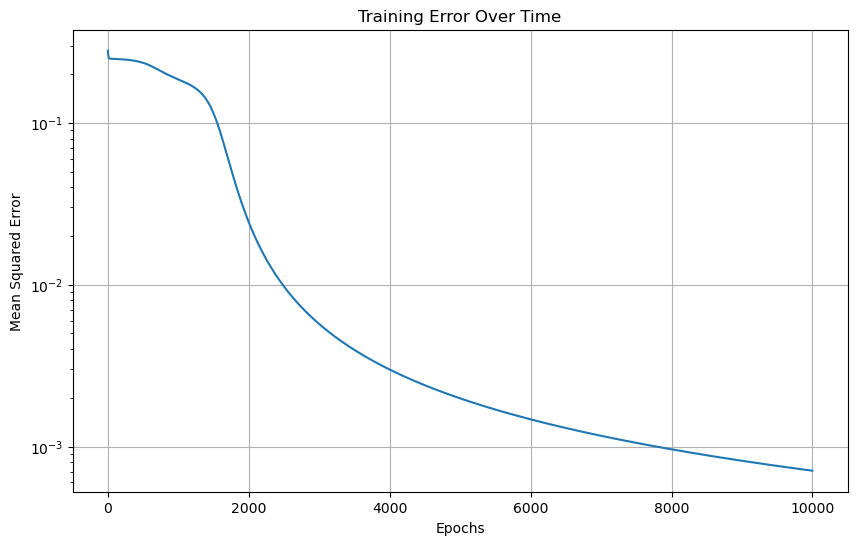


Learned Weights:
Input to Hidden:
[[-4.50184994 -6.15950261]
 [-4.50241221 -6.16241876]]
Hidden to Output:
[[ 9.01652343]
 [-9.22046205]]
Hidden Bias: [[6.6871109  2.46129593]]
Output Bias: [[-4.23195013]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class XORNeuralNetwork:
    def __init__(self, learning_rate=0.5):
        self.learning_rate = learning_rate
        
        # Initialize weights and biases randomly
        self.weights_input_hidden = np.random.uniform(-1, 1, (2, 2))  # 2 inputs to 2 hidden neurons
        self.weights_hidden_output = np.random.uniform(-1, 1, (2, 1))  # 2 hidden neurons to 1 output neuron
        
        self.bias_hidden = np.random.uniform(-1, 1, (1, 2))
        self.bias_output = np.random.uniform(-1, 1, (1, 1))
        
        self.history = []
        
    def sigmoid(self, x):
        # Clip for numerical stability
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        # x is already sigmoid output
        return x * (1 - x)
    
    def forward_pass(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)
        
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.predicted_output = self.sigmoid(self.output_input)
        
        return self.predicted_output

    def backward_pass(self, X, y, predicted_output):
        m = X.shape[0]
        
        output_error = y - predicted_output  # Error at output
        output_delta = output_error * self.sigmoid_derivative(predicted_output)  # Gradient at output
        
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)  # Error propagated to hidden layer
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)  # Gradient at hidden layer
        
        # Update weights and biases
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * self.learning_rate / m
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate / m
        
        self.weights_input_hidden += np.dot(X.T, hidden_delta) * self.learning_rate / m
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * self.learning_rate / m
        
    def train(self, X, y, epochs=10000, print_every=1000):
        for epoch in range(epochs):
            predicted_output = self.forward_pass(X)
            mse = np.mean((y - predicted_output) ** 2)
            self.history.append(mse)
            self.backward_pass(X, y, predicted_output)
            
            if epoch % print_every == 0:
                print(f"Epoch {epoch}, Error: {mse:.6f}")
                
    def predict(self, X):
        return self.forward_pass(X)
          
    def print_results(self, X, y):
        predictions = self.predict(X)
        print("\nFinal Results:")
        print("Input -> Target | Predicted -> Rounded")
        print("-" * 40)
        for i in range(len(X)):
            predicted_val = predictions[i][0]
            rounded_val = round(predicted_val)
            print(f"{X[i]} -> {y[i][0]:.0f}      | {predicted_val:.4f}    -> {rounded_val}")
            
        rounded_predictions = np.round(predictions)
        accuracy = np.mean(rounded_predictions == y) * 100
        print(f"\nAccuracy: {accuracy:.1f}%")

def main():
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([[0],
                  [1],
                  [1],
                  [0]])
    
    nn = XORNeuralNetwork(learning_rate=1.0)
    nn.train(X, y, epochs=10000, print_every=2000)
    
    nn.print_results(X, y)
    
    # Optional: plot training error over epochs
    plt.figure(figsize=(10,6))
    plt.plot(nn.history)
    plt.title('Training Error Over Time')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.yscale('log')
    plt.grid(True)
    plt.show()
    
    print(f"\nLearned Weights:")
    print(f"Input to Hidden:\n{nn.weights_input_hidden}")
    print(f"Hidden to Output:\n{nn.weights_hidden_output}")
    print(f"Hidden Bias: {nn.bias_hidden}")
    print(f"Output Bias: {nn.bias_output}")

if __name__ == "__main__":
    main()
